# Exercise 1:  CT Reconstruction

In this assignment you will explore the basic principles of image reconstruction in computed tomography (CT), in particular filtered back projection and iterative reconstruction. You will use functions to convert an image into radon space and create a sinogram, a synthetic projection per radon or fanbeam (corresponding to parallel or fanbeam geometry respectively).  Then utilizing those synthetic projections, you will reconstruct the original image.

Submit:
* Notebook solutions (code)
* Written explanations/ descriptions in PDF

## Step 1

Create a head phantom or use the Shepp-Logan head phantom. The bright ellipse corresponds to the skull and the structures inside correspond to the various brain tissues and lesions.  Calculate the synthetic projection using radon transform (parallel beam geometry) for the head phantom and the geometric images and explain your results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, iradon
# https://scikit-image.org/docs/stable/auto_examples/transform/plot_radon_transform.html

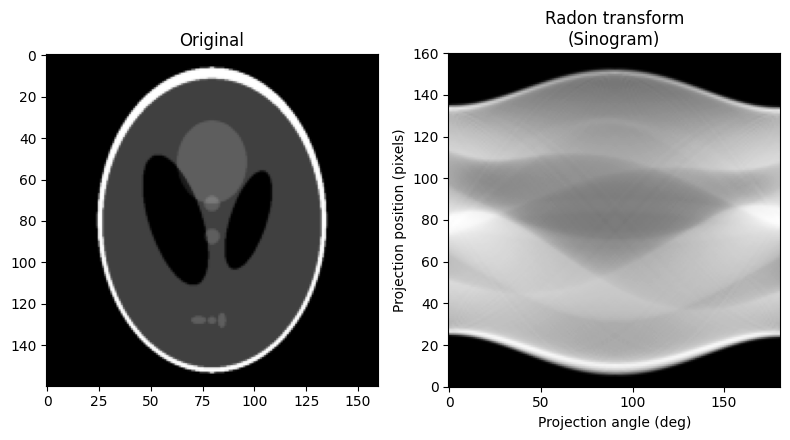

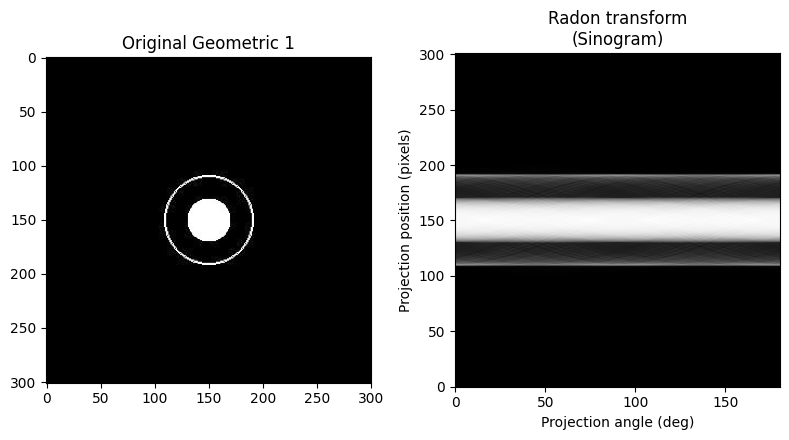

/usr/local/lib/python3.9/dist-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


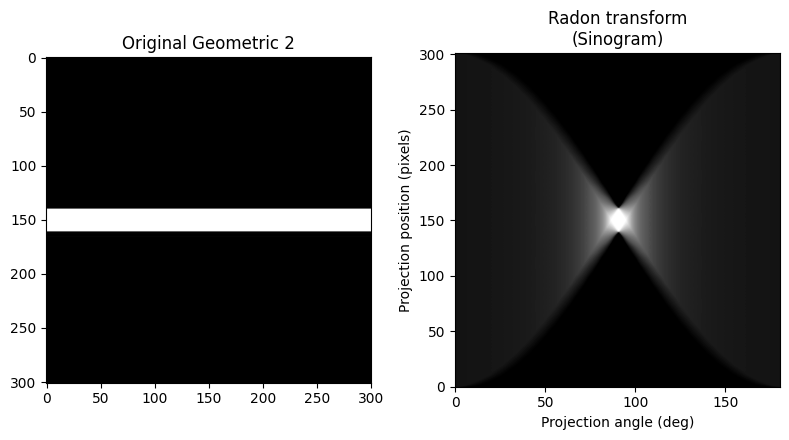

In [ ]:
# Use the Shepp-Logan head phantom and rescale
shepplogan = shepp_logan_phantom()
shepplogan = rescale(shepplogan, scale=0.4, mode='reflect', channel_axis=None)

# load geometric images
geom1 = cv2.imread("geom1.jpg", cv2.IMREAD_GRAYSCALE)
geom2 = cv2.imread("geom2.jpg", cv2.IMREAD_GRAYSCALE)

# plot shepp-logan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(shepplogan, cmap=plt.cm.Greys_r)

# Calculate synthetic projection using radon transform for the head 
theta = np.linspace(0, 180, max(shepplogan.shape), endpoint=False)
sinogram = radon(shepplogan, theta=theta)
dx, dy = 0.5 * 180.0 / max(shepplogan.shape), 0.5 / sinogram.shape[0]

# plot
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r, extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy), aspect='auto')

fig.tight_layout()
plt.show()

# plot geom 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original Geometric 1")
ax1.imshow(geom1, cmap=plt.cm.Greys_r)

# Calculate synthetic projection using radon transform for the head 
theta = np.linspace(0, 180, max(geom1.shape), endpoint=False)
sinogram = radon(geom1, theta=theta)
dx, dy = 0.5 * 180.0 / max(geom1.shape), 0.5 / sinogram.shape[0]

# plot
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r, extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),  aspect='auto')

fig.tight_layout()
plt.show()

# plot geom 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original Geometric 2")
ax1.imshow(geom2, cmap=plt.cm.Greys_r)

# Calculate synthetic projection using radon transform for the head 
theta = np.linspace(0, 180, max(geom2.shape), endpoint=False)
sinogram = radon(geom2, theta=theta)
dx, dy = 0.5 * 180.0 / max(geom2.shape), 0.5 / sinogram.shape[0]

# plot
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r, extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy), aspect='auto')

fig.tight_layout()
plt.show()

## Step 2

Vary the number of projection angles (18,24,90,... ) and perform a reconstruction for each angle increment. Explain the effect of varying the angles.

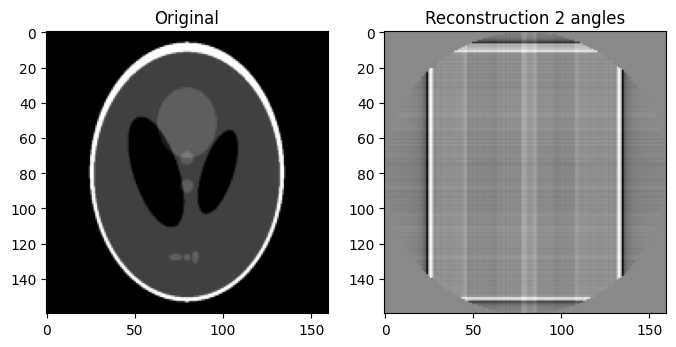

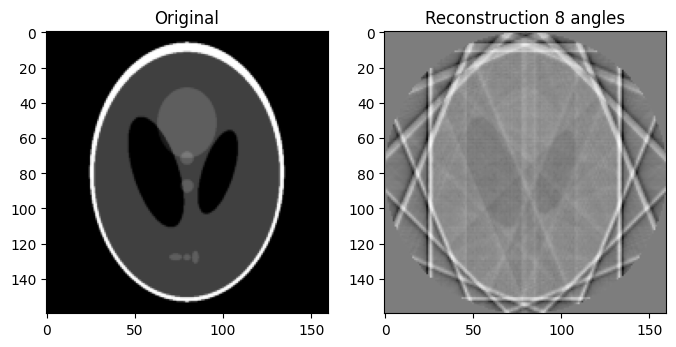

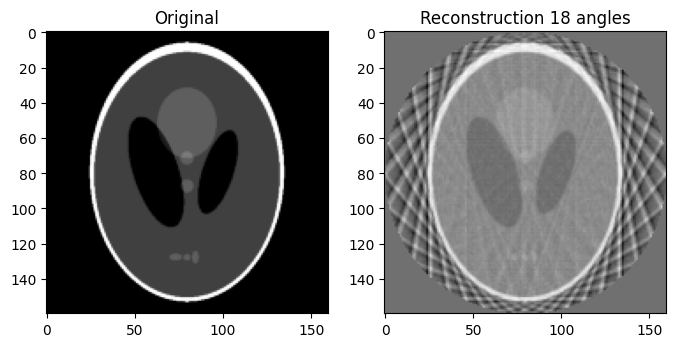

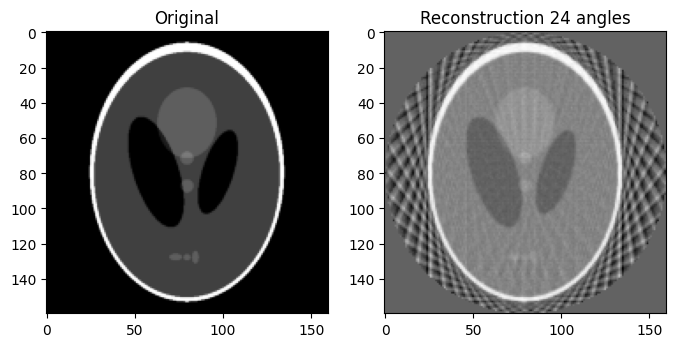

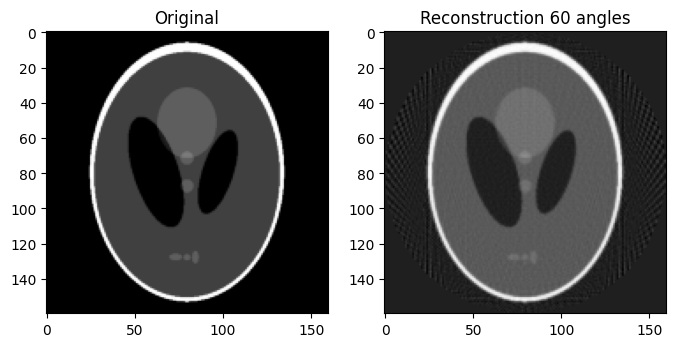

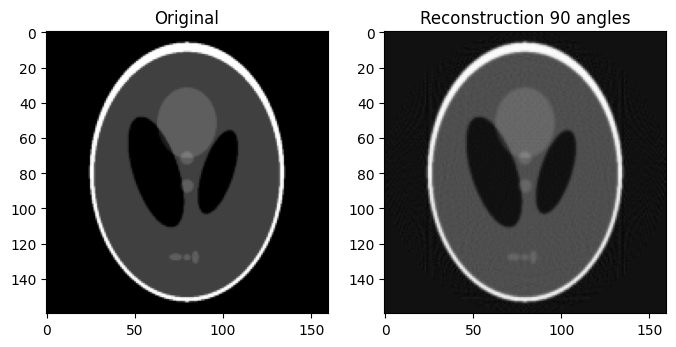

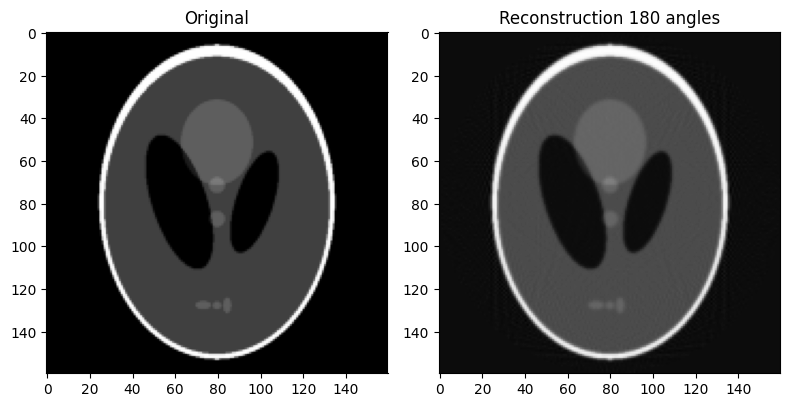

In [ ]:
# Use the Shepp-Logan head phantom and rescale
image = shepp_logan_phantom()
image = rescale(image, scale=0.4, mode='reflect', channel_axis=None)

# define projection angles to use
angles = [2,8,18,24,60,90,180]

for n_angles in angles:

    # Calculate synthetic projection using radon transform for the head 
    theta=np.linspace(0, 180, num=n_angles, endpoint=False)
    sinogram = radon(image, theta)
    dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]

    # perform reconstruction
    reconstruction = iradon(sinogram, theta=theta)

    # plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
    ax1.set_title("Original")
    ax1.imshow(image, cmap=plt.cm.Greys_r)

    # ax2.set_title("Sinogram " + f"{n_angles} angles")
    # # ax2.set_xlabel("Projection angle (deg)")
    # # ax2.set_ylabel("Projection position (pixels)")
    # ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
    #        extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
    #        aspect='auto')
    
    ax2.set_title("Reconstruction" + f" {n_angles} angles")
    # ax3.set_ylabel("Projection position (pixels)")
    ax2.imshow(reconstruction, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()

## Step 3

Demonstrate the difference of performing back projection and filtered back projection. 

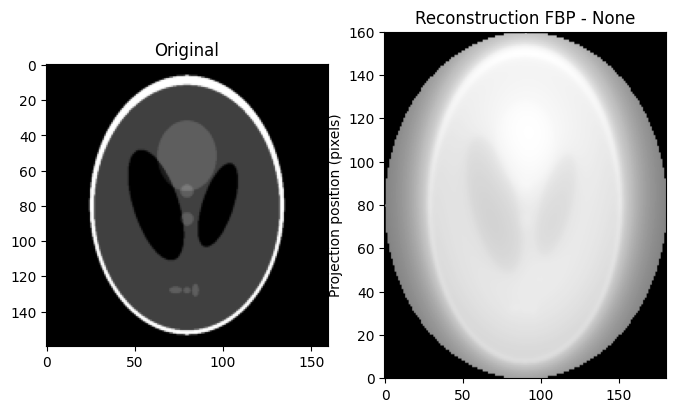

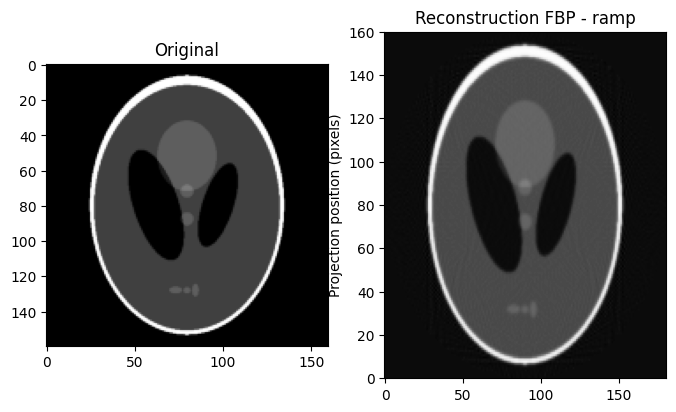

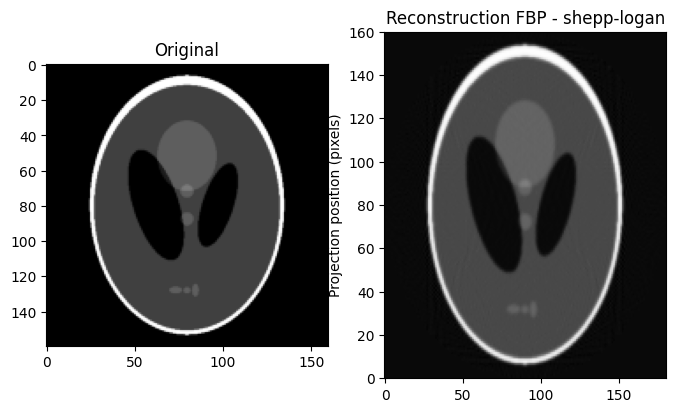

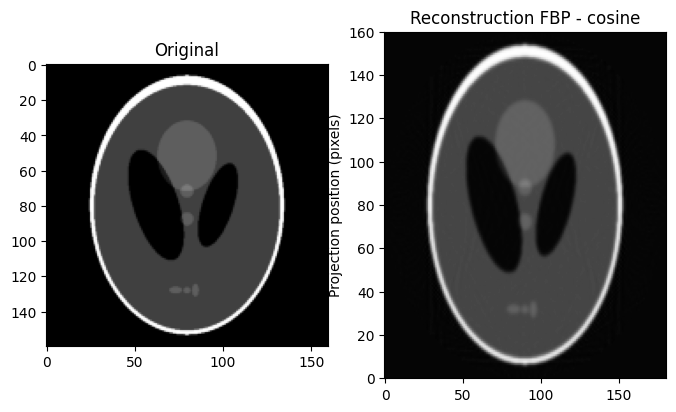

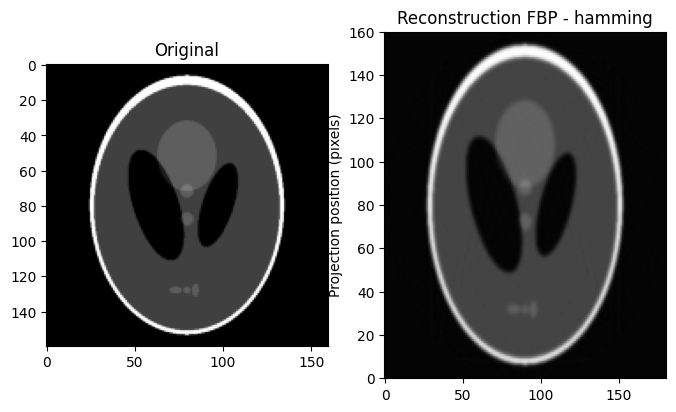

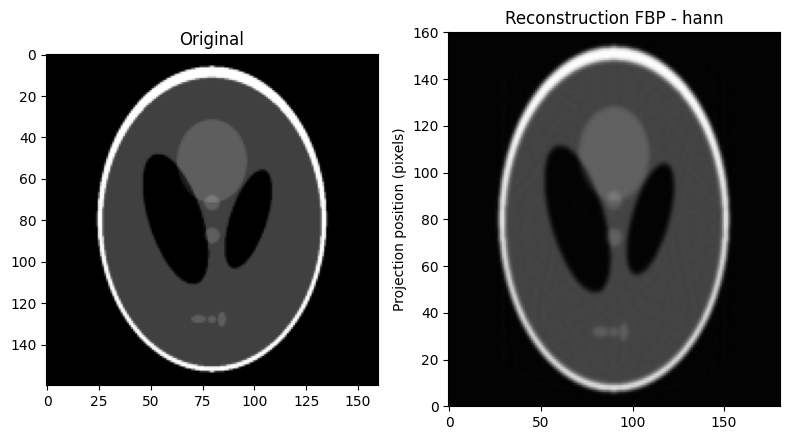

In [ ]:
# Use the Shepp-Logan head phantom and rescale
image = shepp_logan_phantom()
image = rescale(image, scale=0.4, mode='reflect', channel_axis=None)

# try different filters
filters = [None, 'ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']

for filter in filters:

    # Calculate synthetic projection using radon transform for the head - 180 angles
    theta = np.linspace(0, 180, max(image.shape), endpoint=False)
    sinogram = radon(image, theta=theta)
    dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]

    # perform back projection with specified filter
    back_projection = iradon(sinogram, theta=np.linspace(0, 180, max(image.shape), endpoint=False), filter_name=filter)

    # plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
    ax1.set_title("Original")
    ax1.imshow(image, cmap=plt.cm.Greys_r)

    ax2.set_title(f"Reconstruction FBP - {filter}")
    ax2.set_ylabel("Projection position (pixels)")
    ax2.imshow(back_projection, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()




We compared the original image to the FBP reconstruction using different filters, as well as to regular backprojection (unfiltered). The FBP is based on the Fourier slice theorem, which allows us to obtain the 2D Fourier Transform of an object by taking the 2D Fourier transform of each projection and then assembling the sleeves along different directions to get the complete Fourier Transform. In FBP, we transformed the original image to the Fourier domain using the Fourier Slice Theorem to obtain the frequency domain representation of each projection. From here, we can apply the filters in the frequency domain to remove the high frequency noise and artifacts. The different filters are slightly different, but they are all high pass filters that emphasize the low frequency regions of the sinogram and suppress the high frequency components. The full image is backprojected for each projection onto the 2D image plane using the inverse Fourier transform and then the full image is reconstructed by merging the back projected images from all the angles. The reconstruction image that doesn’t use any filter (regular backprojection) has a lot of high frequency noise and artifacts. Additionally, it is more blurry because the high frequency signals were not removed. 


## Step 4

Apply & describe an algebraic  iterative reconstruction technique such as SIRT/ CGLS/ another. 


SIRT (Simultaneous Iterative Reconstruction Technique) iteratively updates the reconstructed image by estimating the contribution of each projection to the image and subtracting the difference between the measured and estimated projections. This method is computationally expensive and requires long running times, as it requires solving a set of linear equations in each iteration.

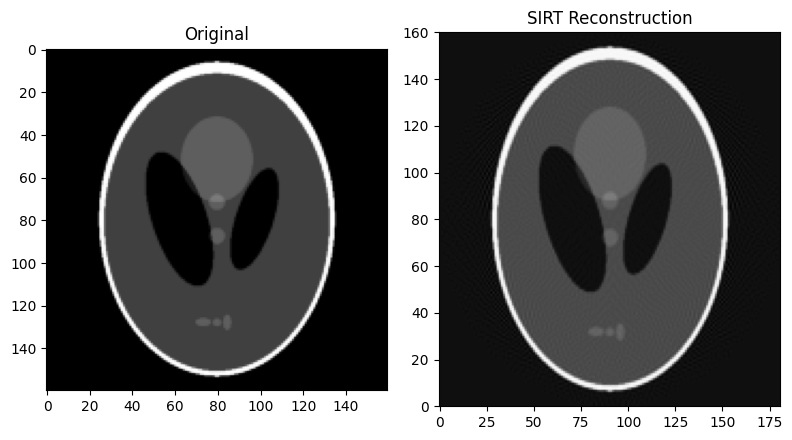

In [ ]:
# Use the Shepp-Logan head phantom and rescale
image = shepp_logan_phantom()
image = rescale(image, scale=0.4, mode='reflect', channel_axis=None)

# Calculate synthetic projection using radon transform for the head 
theta = np.linspace(0, 180, max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]

num_iter = 10

# init reconstruction
reconstruction = np.zeros_like(image)

# SIRT iterations
for i in range(num_iter):
    # compute estimated sinogram based on current reconstruction
    sinogram_estimated = radon(reconstruction, theta=theta)
    
    # compute difference between measured and estimated sinogram
    sinogram_diff = sinogram - sinogram_estimated
    
    # backprojection of difference sinogram
    backprojection = iradon(sinogram_diff, theta=theta)
    
    # add backprojection to reconstruction
    reconstruction += backprojection

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

ax2.set_title("SIRT Reconstruction")
ax2.imshow(reconstruction, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()